# PO1 Aggregate 4 (Official)

In [1]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic

## 1) Load aggregate

In [2]:
load_stl.load_aggregate('C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\PO1_Agg4_Label_40_Official.stl')

Number of points: 336275
Number of elements:
  triangle: 677816

In [3]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('PO1_Agg4_Label_40_Official.vtk')
reader.Update()

aggregate_coord = np.array(reader.GetOutput().GetPoints().GetData())
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

[[0.009054 0.005505 0.001764]
 [0.00905  0.005508 0.001764]
 [0.009054 0.005508 0.001764]
 ...
 [0.008586 0.001584 0.006016]
 [0.008604 0.001584 0.006016]
 [0.008622 0.001584 0.006015]]


In [4]:
print(aggregate_coord.shape)

(336275, 3)


## 2) Bounding box

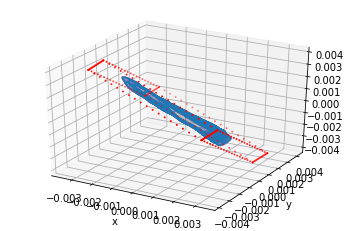

In [5]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [7]:
print(bbox_aggregate)

{'angles': array([-0.72127741, -0.47357671]), 'volume': 4.8320884331422395e-08}


## 3) Bounding ellipsoid

In [6]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-13)

In [12]:
print(bounding_ellipsoid)

{'volume': 5.991936524638601e-08, 'a': 0.0048776000535452795, 'b': 0.004569162484755987, 'c': 0.0006418533401835906, 'bbox': {'angles': array([-0.72127741, -0.47357671]), 'volume': 4.8320884331422395e-08}}


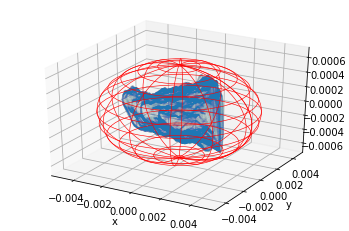

In [13]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 0.0001)

## 4) Included ellipsoid

In [7]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-13)

In [16]:
print(included_ellipsoid)

{'volume': 1.2763624722088365e-09, 'a': 0.0013520989045877761, 'b': 0.001266598229190949, 'c': 0.0001779254528130986, 'bbox': {'angles': array([-0.72127741, -0.47357671]), 'volume': 4.8320884331422395e-08}}


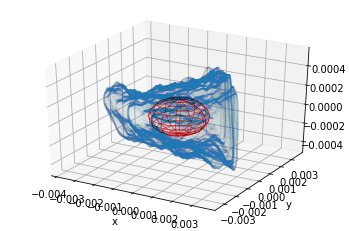

In [17]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 0.0001)

## 5) Middle ellipsoid

In [8]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [19]:
print(middle_ellipsoid)

{'volume': 1.5604858612252683e-08, 'a': 0.003114849479066528, 'b': 0.002917880356973468, 'c': 0.00040988939649834455}


## 6) Roughness Map

In [18]:
reload(ic)
reload(bf)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\plot.py'>

In [9]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [10]:
tomo_surface = 6.6912748e-005
tomo_volume = 1.3782295e-008 

Aggregate standard sphericity =  0.41545400767933893
Bounding box and ellispoids ratios :
a/b = 1.0675041804309486
a/c = 7.599243858651775
b/c = 7.118701732469076
a^2/bc = 8.112224587224983
Bounding ellipsoid surface / Included ellipsoid surface = 13.013531863880289
Aggregate tomographed surface / Bounding ellipsoid surface = 0.45502224711698525
Aggregate tomographed surface / Middle ellipsoid surface = 1.115760071723054
Aggregate tomographed surface / Included ellipsoid surface = 5.921446511631298
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.001234492813370891
 
data min max
theta 0.00023042734362618651 6.282936264348359
phi 0.02900778586471411 3.1263114501254057
alpha 0.00024598215199893937 6.282919452916911
beta 0.0039192795657508 3.139575572912013
distance -0.0026751845389934273 0.0029179434675350607


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

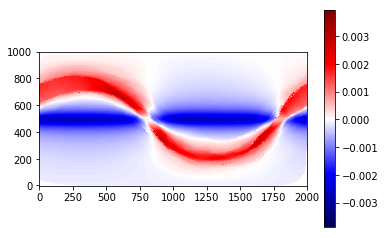

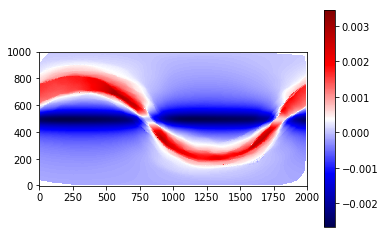

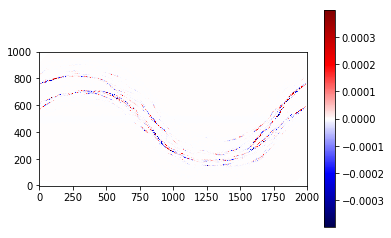

{'aggregate_standard_sphericity': 0.41545400767933893,
 'a/b': 1.0675041804309486,
 'a/c': 7.599243858651775,
 'b/c': 7.118701732469076,
 'a^2/bc': 8.112224587224983,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 13.013531863880289,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.45502224711698525,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.115760071723054,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 5.921446511631298,
 'roughness_distance': array([[1.70967772e+00, 2.27339913e+00, 2.71563664e-03, 1.70099768e+00,
         2.97738003e+00],
        [1.71106644e+00, 2.27271752e+00, 2.71784783e-03, 1.70230167e+00,
         2.97716074e+00],
        [1.70951505e+00, 2.27282492e+00, 2.71749947e-03, 1.70084493e+00,
         2.97719168e+00],
        ...,
        [4.18059962e+00, 6.58480695e-01, 2.13067405e-03, 4.20868609e+00,
         1.06551794e-01],
        [4.19023556e+00, 6.55769057e-01, 2.12619184e-03, 4.21800125e+00,
         1

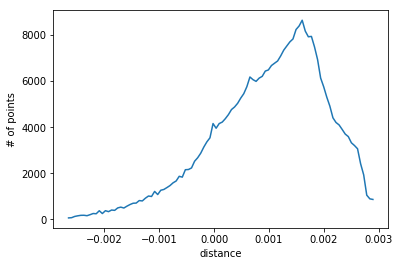

In [20]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.004, sigma=1)

Aggregate standard sphericity =  0.41545400767933893
Bounding box and ellispoids ratios :
a/b = 1.0675041804309486
a/c = 7.599243858651775
b/c = 7.118701732469076
a^2/bc = 8.112224587224983
Bounding ellipsoid surface / Included ellipsoid surface = 13.013531863880289
Aggregate tomographed surface / Bounding ellipsoid surface = 0.45502224711698525
Aggregate tomographed surface / Middle ellipsoid surface = 1.115760071723054
Aggregate tomographed surface / Included ellipsoid surface = 5.921446511631298
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.001234492813370891
 
data min max
theta 0.00023042734362618651 6.282936264348359
phi 0.02900778586471411 3.1263114501254057
alpha 0.00024598215199893937 6.282919452916911
beta 0.0039192795657508 3.139575572912013
distance -0.0026751845389934273 0.0029179434675350607


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

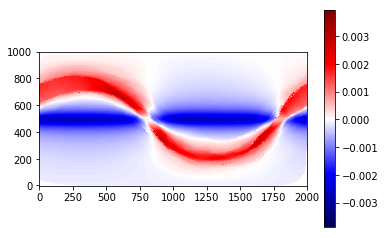

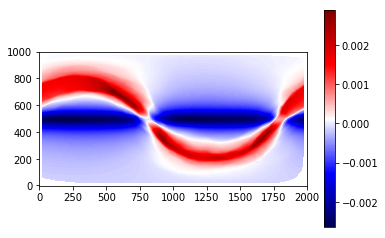

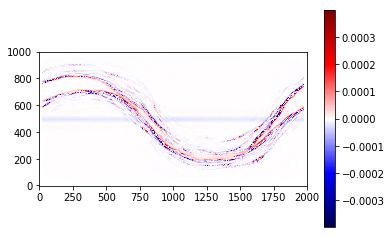

{'aggregate_standard_sphericity': 0.41545400767933893,
 'a/b': 1.0675041804309486,
 'a/c': 7.599243858651775,
 'b/c': 7.118701732469076,
 'a^2/bc': 8.112224587224983,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 13.013531863880289,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.45502224711698525,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.115760071723054,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 5.921446511631298,
 'roughness_distance': array([[1.70967772e+00, 2.27339913e+00, 2.71563664e-03, 1.70099768e+00,
         2.97738003e+00],
        [1.71106644e+00, 2.27271752e+00, 2.71784783e-03, 1.70230167e+00,
         2.97716074e+00],
        [1.70951505e+00, 2.27282492e+00, 2.71749947e-03, 1.70084493e+00,
         2.97719168e+00],
        ...,
        [4.18059962e+00, 6.58480695e-01, 2.13067405e-03, 4.20868609e+00,
         1.06551794e-01],
        [4.19023556e+00, 6.55769057e-01, 2.12619184e-03, 4.21800125e+00,
         1

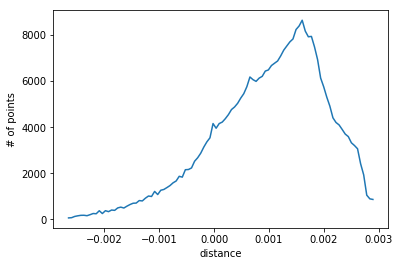

In [19]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.004, sigma=5)

Aggregate standard sphericity =  0.41545400767933893
Bounding box and ellispoids ratios :
a/b = 1.0675041804309486
a/c = 7.599243858651775
b/c = 7.118701732469076
a^2/bc = 8.112224587224983
Bounding ellipsoid surface / Included ellipsoid surface = 13.013531863880289
Aggregate tomographed surface / Bounding ellipsoid surface = 0.45502224711698525
Aggregate tomographed surface / Middle ellipsoid surface = 1.115760071723054
Aggregate tomographed surface / Included ellipsoid surface = 5.921446511631298
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.001234492813370891
 
data min max
theta 0.00023042734362618651 6.282936264348359
phi 0.02900778586471411 3.1263114501254057
alpha 0.00024598215199893937 6.282919452916911
beta 0.0039192795657508 3.139575572912013
distance -0.0026751845389934273 0.0029179434675350607


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

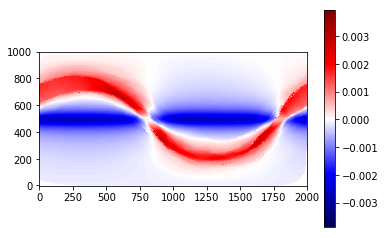

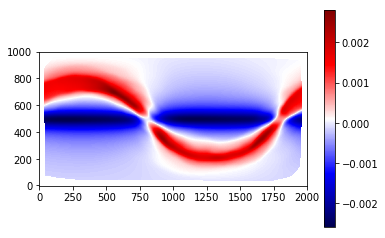

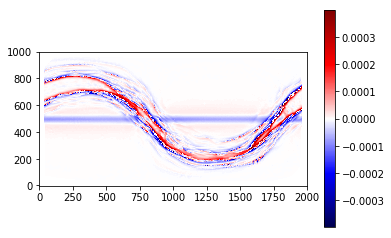

{'aggregate_standard_sphericity': 0.41545400767933893,
 'a/b': 1.0675041804309486,
 'a/c': 7.599243858651775,
 'b/c': 7.118701732469076,
 'a^2/bc': 8.112224587224983,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 13.013531863880289,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.45502224711698525,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.115760071723054,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 5.921446511631298,
 'roughness_distance': array([[1.70967772e+00, 2.27339913e+00, 2.71563664e-03, 1.70099768e+00,
         2.97738003e+00],
        [1.71106644e+00, 2.27271752e+00, 2.71784783e-03, 1.70230167e+00,
         2.97716074e+00],
        [1.70951505e+00, 2.27282492e+00, 2.71749947e-03, 1.70084493e+00,
         2.97719168e+00],
        ...,
        [4.18059962e+00, 6.58480695e-01, 2.13067405e-03, 4.20868609e+00,
         1.06551794e-01],
        [4.19023556e+00, 6.55769057e-01, 2.12619184e-03, 4.21800125e+00,
         1

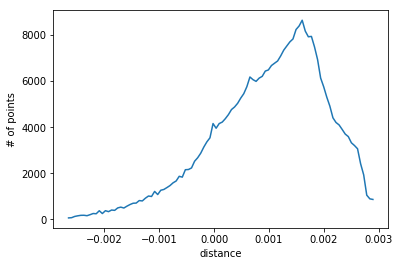

In [22]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.004, sigma=10)

Aggregate standard sphericity =  0.41545400767933893
Bounding box and ellispoids ratios :
a/b = 1.0675041804309493
a/c = 7.599243858651776
b/c = 7.118701732469073
a^2/bc = 8.112224587224988
Bounding ellipsoid surface / Included ellipsoid surface = 13.013540010778447
Aggregate tomographed surface / Bounding ellipsoid surface = 0.4550219622582993
Aggregate tomographed surface / Middle ellipsoid surface = 1.115759524824478
Aggregate tomographed surface / Included ellipsoid surface = 5.921446511631298
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0012344926849049442
 
data min max
theta 0.00023042734362618651 6.282936264348359
phi 0.02900778586471411 3.1263114501254057
alpha 0.0002459821519989395 6.282919452916911
beta 0.0039192795657508 3.139575572912013
distance -0.0026751852842989907 0.002917943295198321


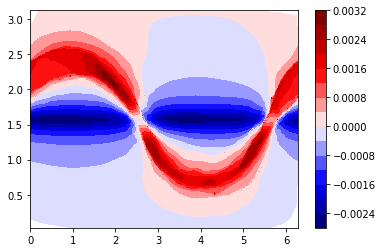

{'aggregate_standard_sphericity': 0.41545400767933893,
 'a/b': 1.0675041804309493,
 'a/c': 7.599243858651776,
 'b/c': 7.118701732469073,
 'a^2/bc': 8.112224587224988,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 13.013540010778447,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.4550219622582993,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.115759524824478,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 5.921446511631298,
 'roughness_distance': array([[1.70967772e+00, 2.27339913e+00, 2.71563649e-03, 1.70099768e+00,
         2.97738003e+00],
        [1.71106644e+00, 2.27271752e+00, 2.71784768e-03, 1.70230167e+00,
         2.97716074e+00],
        [1.70951505e+00, 2.27282492e+00, 2.71749932e-03, 1.70084493e+00,
         2.97719168e+00],
        ...,
        [4.18059962e+00, 6.58480695e-01, 2.13067392e-03, 4.20868609e+00,
         1.06551794e-01],
        [4.19023556e+00, 6.55769057e-01, 2.12619171e-03, 4.21800125e+00,
         1.

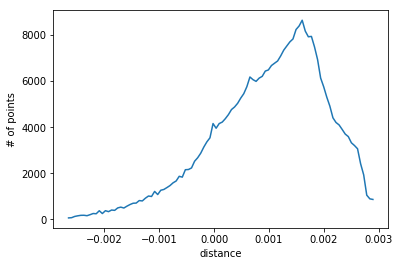

In [24]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.003)

Aggregate standard sphericity =  0.41545400767933893
Bounding box and ellispoids ratios :
a/b = 1.0675041804309486
a/c = 7.599243858651775
b/c = 7.118701732469076
a^2/bc = 8.112224587224983
Bounding ellipsoid surface / Included ellipsoid surface = 13.013531863880289
Aggregate tomographed surface / Bounding ellipsoid surface = 0.45502224711698525
Aggregate tomographed surface / Middle ellipsoid surface = 1.115760071723054
Aggregate tomographed surface / Included ellipsoid surface = 5.921446511631298
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.001234492813370891
 
data min max
theta 0.00023042734362618651 6.282936264348359
phi 0.02900778586471411 3.1263114501254057
alpha 0.00024598215199893937 6.282919452916911
beta 0.0039192795657508 3.139575572912013
distance -0.0026751845389934273 0.0029179434675350607


C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in less
  zi[(zi<zmin) | (zi>zmax)] = None
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in greater
  zi[(zi<zmin) | (zi>zmax)] = None


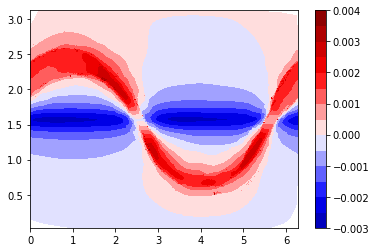

{'aggregate_standard_sphericity': 0.41545400767933893,
 'a/b': 1.0675041804309486,
 'a/c': 7.599243858651775,
 'b/c': 7.118701732469076,
 'a^2/bc': 8.112224587224983,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 13.013531863880289,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.45502224711698525,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.115760071723054,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 5.921446511631298,
 'roughness_distance': array([[1.70967772e+00, 2.27339913e+00, 2.71563664e-03, 1.70099768e+00,
         2.97738003e+00],
        [1.71106644e+00, 2.27271752e+00, 2.71784783e-03, 1.70230167e+00,
         2.97716074e+00],
        [1.70951505e+00, 2.27282492e+00, 2.71749947e-03, 1.70084493e+00,
         2.97719168e+00],
        ...,
        [4.18059962e+00, 6.58480695e-01, 2.13067405e-03, 4.20868609e+00,
         1.06551794e-01],
        [4.19023556e+00, 6.55769057e-01, 2.12619184e-03, 4.21800125e+00,
         1

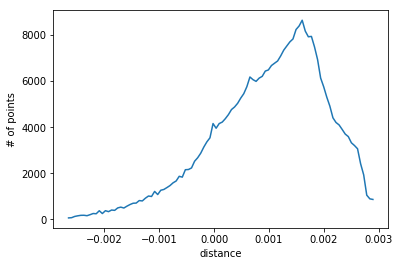

In [8]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.004)